In [3]:
%matplotlib inline


# Comparing in-situ data to model output

In this example, we'll see how to compare in-situ data taken by a spacecraft
to equivalent observables in the model along the 1D spacecraft trajectory.

This consists of three steps:
1. Load the spacecraft data
2. Generate the spacecraft trajectory at the in-situ data timestamps
3. Use this trajectory to take samples in the 3D model output

The first two steps are accomplished using ``heliopy.data``
(to get the in-situ data) and ``heliopy.spice`` (to get the trajectory). This
is then fed into `Variable.sample_at_coords` to get the model values, which
we then compare to the in-situ data.


First, load the required modules.



In [4]:
import matplotlib.pyplot as plt

from heliopy.data import psp
import heliopy.data.spice as spicedata
import heliopy.spice as spice

from psipy.model import MASOutput
from psipy.data import sample_data

Load a set of MAS output files.



In [5]:
mas_path = sample_data.mas_helio()
model = MASOutput(mas_path)
print(model.variables)

['br', 'rho', 'vr']


In [6]:
vr_model = model['vr']

In [7]:
vr_model

Load PSP data.

Here we load the merged magnetic field and plasma data product, which has
an hourly data cadence.



In [8]:
starttime = '2018-11-23'
endtime = '2018-11-24'
psp_data = psp.merged_mag_plasma(starttime, endtime)
print(psp_data.columns)

['radialDistance', 'heliographicLatitude', 'heliographicLongitude', 'BR', 'BT', 'BN', 'B', 'VR', 'VT', 'VN', 'ProtonSpeed', 'flow_theta', 'flow_lon', 'protonDensity', 'protonTemp']


Generate the PSP trajectory.

We take the timestamps from the previously loaded data, and use `heliopy.spice`
to generate the trajectory at these times.



In [9]:
times = psp_data.index

spicedata.get_kernel('psp')
spicedata.get_kernel('psp_pred')
psp_traj = spice.Trajectory('SPP')
psp_traj.generate_positions(times, 'Sun', 'IAU_SUN')
psp_coords = psp_traj.coords
print(psp_coords)

<SkyCoord (HeliographicCarrington: obstime=['2018-11-23T01:00:00.000000000' '2018-11-23T01:00:00.000000000'
 '2018-11-23T02:00:00.000000000' '2018-11-23T02:00:00.000000000'
 '2018-11-23T03:00:00.000000000' '2018-11-23T03:00:00.000000000'
 '2018-11-23T04:00:00.000000000' '2018-11-23T04:00:00.000000000'
 '2018-11-23T05:00:00.000000000' '2018-11-23T05:00:00.000000000'
 '2018-11-23T06:00:00.000000000' '2018-11-23T06:00:00.000000000'
 '2018-11-23T07:00:00.000000000' '2018-11-23T07:00:00.000000000'
 '2018-11-23T08:00:00.000000000' '2018-11-23T08:00:00.000000000'
 '2018-11-23T09:00:00.000000000' '2018-11-23T09:00:00.000000000'
 '2018-11-23T10:00:00.000000000' '2018-11-23T10:00:00.000000000'
 '2018-11-23T11:00:00.000000000' '2018-11-23T11:00:00.000000000'
 '2018-11-23T12:00:00.000000000' '2018-11-23T12:00:00.000000000'
 '2018-11-23T13:00:00.000000000' '2018-11-23T13:00:00.000000000'
 '2018-11-23T14:00:00.000000000' '2018-11-23T14:00:00.000000000'
 '2018-11-23T15:00:00.000000000' '2018-11-23T15

Take a sample of the radial velocity.

Here we start by getting the radial velocity `Variable` from the model, and
then use the PSP corodinate information to sample it.



In [10]:
vr_model = model['vr']
vr_sampled = vr_model.sample_at_coords(psp_coords.lon,
                                       psp_coords.lat,
                                       psp_coords.radius)

We can now plot a comparison between the model and in-situ measurements.



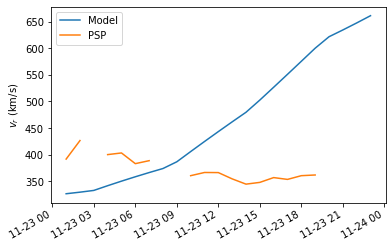

In [11]:
fig, ax = plt.subplots()
ax.plot(times, vr_sampled, label='Model')
ax.plot(times, psp_data.quantity('VR'), label='PSP')

ax.set_ylabel(r'$v_{r}$ (km/s)')
ax.legend()
fig.autofmt_xdate()

To finish, we'll perform the same comparison, but with a few different
variables.



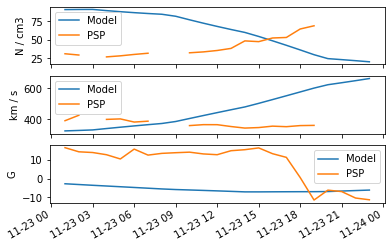

In [12]:
fig, axs = plt.subplots(nrows=3, sharex=True)
for ax, mas_name, psp_name in zip(axs,
                                  ['rho', 'vr', 'br'],
                                  ['protonDensity', 'VR', 'BR']):
    model_var = model[mas_name]
    sampled = model_var.sample_at_coords(psp_coords.lon,
                                         psp_coords.lat,
                                         psp_coords.radius)

    in_situ = psp_data.quantity(psp_name)

    # Note that we convert the sampled data to the same units as the PSP data
    ax.plot(times, sampled.to(in_situ.unit), label='Model')
    ax.plot(times, in_situ, label='PSP')

    ax.set_ylabel(str(model_var.unit))
    ax.legend()

fig.autofmt_xdate()

plt.show()

In [15]:
psp_coords.radius

<Distance [72632535.49161008, 72632535.49161008, 72745518.90396425,
           72745518.90396425, 72858365.74718764, 72858365.74718764,
           72971076.15302849, 72971076.15302849, 73083650.25383021,
           73083650.25383021, 73196088.18247232, 73196088.18247232,
           73308390.07240348, 73308390.07240348, 73420556.05758302,
           73420556.05758302, 73532586.27249902, 73532586.27249902,
           73644480.85213584, 73644480.85213584, 73756239.93196116,
           73756239.93196116, 73867863.64792952, 73867863.64792952,
           73979352.13644336, 73979352.13644336, 74090705.53435445,
           74090705.53435445, 74201923.97895052, 74201923.97895052,
           74313007.60793975, 74313007.60793975, 74423956.55943608,
           74423956.55943608, 74534770.9719599 , 74534770.9719599 ,
           74645450.98439716, 74645450.98439716, 74755996.73602128,
           74755996.73602128, 74866408.36645755, 74866408.36645755,
           74976686.01567593, 74976686.01567593,